In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import scipy.stats as stats

In [7]:
np.random.binomial(1, 0.5)

1

In [33]:
np.random.binomial(1000, 0.5)

531

In [48]:
n = np.random.binomial(20, .5, 10000)
(n>=15).mean()

0.0218

In [120]:
np.random.binomial(10, 1/6, 10000).mean()

1.6659

In [121]:
10/6

1.6666666666666667

In [133]:
x = np.random.normal(5, 2, size = 10000)

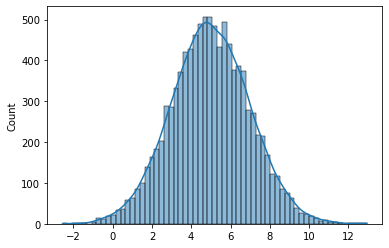

In [140]:
sns.distplot(x, kde = True, fill = True)

In [137]:
stats.skew(x)

0.0313288290263335

## Maximum Likelihood Estimation

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.optimize import minimize 

In [5]:
# generate an independent variable 
x = np.linspace(-10, 30, 100)
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-16.682258
1,-9.595960,-19.150412
2,-9.191919,-21.490804
3,-8.787879,-15.230049
4,-8.383838,-15.370746


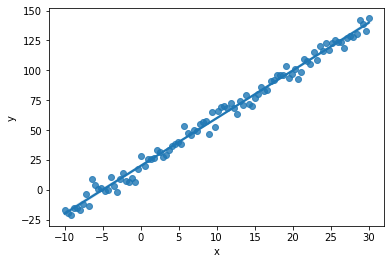

In [6]:
sns.regplot(x='x', y='y', data = df)
plt.show() 

In [12]:
features = sm.add_constant(df.x)
model = sm.OLS(y, features).fit()
# model.summary()
# model.tvalues
model.params

const    19.982938
x         3.996995
dtype: float64

In [8]:
# residual = y_true - y_pred 

res = model.resid
standard_dev = np.std(res, ddof = 0)
standard_dev

4.780225277054529

In [9]:
# MLE function
def MLE_Norm(param):
    const, beta, std_dev = param
    # predict the output
    pred = const + beta*x
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL 

In [10]:
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B', options={'disp': True})
mle_model 

      fun: 298.3426207688484
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([5.68434189e-06, 2.84217094e-05, 5.68434189e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 244
      nit: 37
   status: 0
  success: True
        x: array([19.98293997,  3.99699484,  4.78022614])

## Confidence Intervals

In [5]:
def abline(slope, intercept=0):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

def confidence_interval(n, confidence=0.95):
    a = np.random.normal(size=n)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [6]:
from scipy.stats import ttest_1samp

In [7]:
data = [0.9193010,  0.2162517,  0.1790611, -0.5220764, -0.4086740,  1.5311779,  0.4575750, -0.5996455, 1.8689674, -1.1233079]
ttest_1samp(data, popmean = 0)

Ttest_1sampResult(statistic=0.8245387056792826, pvalue=0.4309431512949804)

In [8]:
confidence_interval(10)

(-1.069842415493175, 0.6330088807830025)

In [9]:
x = np.ones((100, 2))*10
for i, val in enumerate(x):
    x[i] = confidence_interval(10)

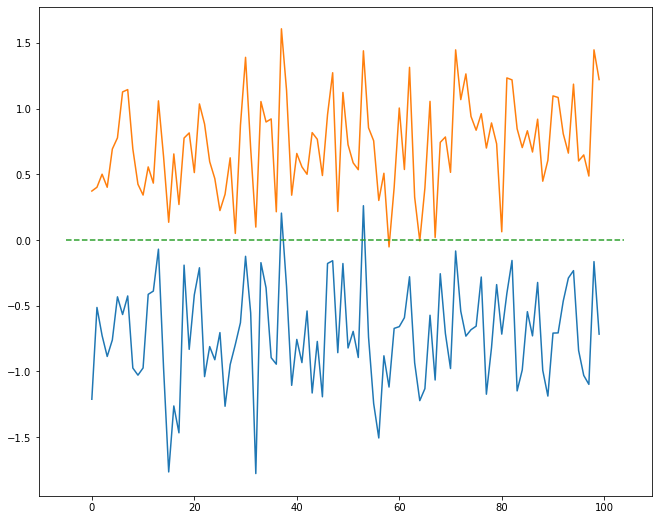

In [10]:
f, ax = plt.subplots(figsize =(11, 9))
plt.plot(x[:, 0])
plt.plot(x[:, 1])
abline(0,0)

In [11]:
num = (x[:, 0] < 0) & (x[:, 1] >0)
num.sum()/x.shape[0]

0.96

In [12]:
import researchpy as rp
# rp.ttest(data)
# https://www.pythonfordatascience.org/independent-samples-t-test-python/

In [13]:
stats.beta(1291, 2243).ppf(.025), stats.beta(1291, 2243).ppf(.975)

(0.34950849576669035, 0.3812527660468855)

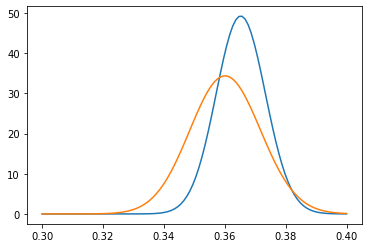

In [14]:
x = np.linspace(0.3, 0.4, num =100)
plt.plot(x, stats.beta(1291, 2243).pdf(x))
plt.plot(x, stats.beta(616, 1094).pdf(x))

In [16]:
stats.binom(11, 0.5).ppf(q = [0.025, 0.975])

array([2., 9.])

In [20]:
stats.binom(11, 0.5).cdf(8) - stats.binom(11, 0.5).cdf(1)

0.96142578125

In [34]:
def f(n):
    X = stats.uniform().rvs(n)
    Y = np.sort(X)
    return (Y[2], Y[9])

In [37]:
f(11)

(0.09549752538254042, 0.7960134600330862)

## Hypothesis Testing

In [39]:
d = {'y': [8 ,13 ,12 ,13 ,14 , 5, 14,15, 11, 13, 10,  8, 10, 11, 12, 11,  6,  7, 12, 14], 'n': [56 ,55, 58, 56, 57, 54, 56, 57, 54, 55, 57, 59, 54, 55, 56, 57, 54, 58, 58, 58]}
data = pd.DataFrame(data =d)
data.head()

,y,n
0,8,56
1,13,55
2,12,58
3,13,56
4,14,57


In [44]:
data['phat'] = data.y/data.n
data.phat = abs(data.phat-0.2)/np.sqrt(0.2*0.8/data.n)`

In [48]:
(np.sum(data.phat>1.96))/20

0.05

In [62]:
# CI = phat +- 1.96*sqrt(0.2*0.8/n)
x = pd.DataFrame(data = {'lowB' :(data.y/data.n - 1.96*np.sqrt((data.y/data.n)*(1 - (data.y/data.n))/data.n)), 'uppB':(data.y/data.n + 1.96*np.sqrt((data.y/data.n)*(1 - (data.y/data.n))/data.n))})
np.sum((x.lowB < 0.2) & (x.uppB >0.2))/20

0.9

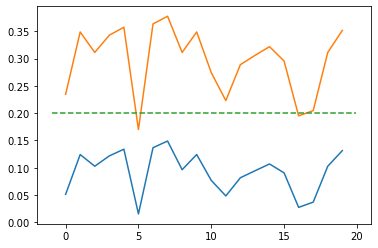

In [63]:
plt.plot(x.lowB)
plt.plot(x.uppB)
abline(0, 0.2)

### Type I and Type II errors

TIP: 
*Type 1* error is the probability of rejecting h0 when h0 is TRUE

*Type 2* error is the probability of not rejecting h0 when h1 is TRUE

if value lies in the critical region, then it means reject h0

In [65]:
alpha = stats.binom(10, 0.5).cdf(3.5)
alpha

0.17187499999999994

In [66]:
beta = 1- stats.binom(10, 0.25).cdf(3.5)
beta

0.22412490844726562

In [79]:
np.sum(stats.binom(10,p =0.25).rvs(200) > 3.5)/200

0.23

Q. A ball is drawn from one of two bowls. Bowl A contains 100 red balls and 200 white
balls; Bowl B contains 200 red balls and 100 white balls. Let p denote the probability
of drawing a red ball from the bowl. Then p is unknown as we don’t know which
bowl is being used.To test the simple null hypothesis H0 : p = 1/3 against the simple
alternative that p = 2/3, three balls are drawn at random with replacement from the
selected bowl. Let X be the number of red balls drawn. Let the critical region be
C = {x : x = 2, 3}. Using R, what are the probabilities alpha and beta respectively of Type
I and Type II errors?

In [100]:
# For Bowl A, p = 1/3 and Bowl B, p = 2/3

np.sum(stats.binom(3, p =1/3).pmf([2, 3]))

0.2592592592592592

In [102]:
# For Bowl A, p = 1/3 and Bowl B, p = 2/3

1-np.sum(stats.binom(3, p =2/3).pmf([2, 3]))

0.2592592592592593

Q. Let Y ~ binomial(100; p). To test H0 : p = 0.08 against H1 : p < 0.08, we reject H0
and accept H1 if and only if Y <= 6. Using Python,

a. Determine the significance level alpha of the test.

In [121]:
stats.binom(100, 0.08).cdf(6)

0.3031559914686833

b. Find the probability of a Type II error if in fact p = 0:04.

In [124]:
1 - stats.binom(100, 0.04).cdf(6)

0.10639231790455839

A company that manufactures brackets for an auto maker regularly selects brackets from the production line and performs a torque test. The goal is for the mean torque to equal 125. Let X ~ N(mu; sigma^2) be the torque and suppose we take a random sample of size n = 15 to test H0 : mu = 125 against a two sided alternative. Suppose the following data are observed:

128 149 136 114 126 142 124 136 122 118 122 129 118 122 129

Use the t.test command to test the hypotheses and construct a 95% confidence interval for mu.

In [125]:
data = [128, 149, 136, 114, 126, 142, 124, 136 ,122, 118 ,122, 129, 118, 122, 129]

In [127]:
stats.ttest_1samp(data, popmean = 125)

Ttest_1sampResult(statistic=1.0762069052923653, pvalue=0.3000316671916328)

In [139]:
t_statistic = (np.mean(data) - 125)/(np.std(data, ddof =1)/np.sqrt(15))
t_statistic

1.0762069052923653

In [140]:
p_value = 2*(1-stats.t(14).cdf(t_statistic))
p_value

0.30003166719163277

In [141]:
CI =(np.mean(data) - np.std(data, ddof =1)*stats.t(len(data)-1).ppf(0.975)/np.sqrt(len(data)), 
np.mean(data) + np.std(data, ddof =1)*stats.t(len(data)-1).ppf(0.975)/np.sqrt(len(data)))
CI

(122.35223210984256, 132.98110122349078)